## Iniciate Collab on gdrive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# cd '/content/drive/MyDrive/Brain_Matrix/S1_opto_Thal'

## Install neuron netpyne bluepysnap in the Google collab

In [3]:
# pip install pandas==1.5.3 numpy==1.23.5 neuron==8.2.2 netpyne==1.0.5

In [6]:
# !nrnivmodl mod2/

# NetPyNE

In [7]:
"""
cfg.py

High-level specifications for S1-thalamus network model using NetPyNE

Contributors: salvadordura@gmail.com, fernandodasilvaborges@gmail.com

# edges files not inclued in https://github.com/FernandoSBorges/
"""

from netpyne import specs
import json
import os
import numpy as np

%matplotlib inline

cfg = specs.SimConfig()

#------------------------------------------------------------------------------
#
# SIMULATION CONFIGURATION
#
#------------------------------------------------------------------------------

cfg.coreneuron = False

#------------------------------------------------------------------------------
# Select nodes to simulate
#------------------------------------------------------------------------------

f = open('cells_info_data.json')

Lista = json.load(f)

print(Lista)

cfg.hoclist = Lista["hoclist"]
cfg.Morpholist = Lista["Morpholist"]
cfg.gid_list = Lista["gid_list"]
# cfg.cellName_list = Lista["cellName_list"]
# cfg.cellsList = Lista["cellsList"]

cfg.Epops = []
cfg.Ipops = []

cfg.cellNumber = {}
cfg.popLabel = {}
cfg.popNumber = {}

cfg.cellNumber['L4_BP_cNAC_0'] = 1
cfg.cellNumber['L4_BTC_cNAC_1'] = 1
cfg.cellNumber['L4_NBC_cNAC_2'] = 1
cfg.cellNumber['L4_SSC_cADpyr_3'] = 1
cfg.cellNumber['L4_TPC_cADpyr_4'] = 1
cfg.cellNumber['L4_TPC_cADpyr_5'] = 1
cfg.cellNumber['L4_UPC_cADpyr_6'] = 1

for cellName in sorted(cfg.gid_list.keys()):

    if 'cADpyr' in cellName:
        cfg.Epops.append(cellName)
    else:
        cfg.Ipops.append(cellName)

    cfg.popLabel[cellName] = cellName # No cell diversity in NetPyNE
    cfg.popNumber[cellName] = cfg.cellNumber[cellName]


print(cfg.cellNumber)
print(cfg.popNumber)



{'hoclist': {'108767': 'cNAC_L6NGC', '141766': 'cNAC_L6NGC', '138433': 'cNAC_L6NGC', '141369': 'cADpyr_L4TPC', '129252': 'cADpyr_L4TPC', '133426': 'cADpyr_L4TPC', '114284': 'cADpyr_L4UPC'}, 'Morpholist': {'108767': 'rp140319_ChC_3_idA_-_Scale_x1.000_y0.950_z1.000_-_Clone_1.asc', '141766': 'rp110127_L5-2_idG_-_Scale_x1.000_y0.950_z1.000.asc', '138433': 'rp110131_L5-1_idA_-_Scale_x1.000_y1.025_z1.000_-_Clone_0.asc', '141369': 'dend-rp120608_P_3_idD_axon-sm100429a1-5_INT_idG_-_Scale_x1.000_y1.050_z1.000_-_Clone_0.asc', '129252': 'dend-mtC050800E_idD_axon-sm100429a1-5_INT_idD_-_Scale_x1.000_y1.050_z1.000_-_Clone_0.asc', '133426': 'dend-mtC050800E_idD_axon-sm100429a1-5_INT_idD_-_Scale_x1.000_y0.975_z1.000_-_Clone_0.asc', '114284': 'dend-rp120803_P_1_idB_axon-C031097B-P3_-_Scale_x1.000_y0.975_z1.000_-_Clone_0.asc'}, 'gid_list': {'L4_BP_cNAC_0': 108767, 'L4_BTC_cNAC_1': 141766, 'L4_NBC_cNAC_2': 138433, 'L4_SSC_cADpyr_3': 141369, 'L4_TPC_cADpyr_4': 129252, 'L4_TPC_cADpyr_5': 133426, 'L4_UPC_cA

In [8]:
#------------------------------------------------------------------------------
# Run parameters
#------------------------------------------------------------------------------
cfg.duration = 1.2*1e3 ## Duration of the sim, in ms
cfg.dt = 0.025
cfg.seeds = {'cell': 4321, 'conn': 4321, 'stim': 1000, 'loc': 4321}
cfg.hParams = {'celsius': 34, 'v_init': -84.0}
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.1

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True
cfg.checkErrors = False

#--------------------------------------------------------------------------
# Recording
#--------------------------------------------------------------------------
cfg.allpops = cfg.Epops + cfg.Ipops
cfg.recordCells = cfg.allpops # record all cells
cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},
                    # 'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
                    # 'V_dend_0': {'sec':'dend_0', 'loc':0.5, 'var':'v'},
                    }
cfg.recordStim = False
cfg.recordTime = False
cfg.recordStep = 0.025

#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'v0_batch0'       #   + str(cfg.cynradNumber)
cfg.saveFolder = 'data/'+cfg.simLabel
# cfg.filename =                	## Set file output name
cfg.savePickle = True	        	## Save pkl file
cfg.saveJson = False           	## Save json file
cfg.saveDataInclude = ['simData', 'simConfig', 'net', 'netParams'] ## ['simData'] ##  ['simData'] ##, , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##
cfg.gatherOnlySimData = False	##
cfg.saveCellSecs = True
cfg.saveCellConns = True

#------------------------------------------------------------------------------
# Analysis and plotting
# ------------------------------------------------------------------------------
cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'cell', 'overlay': True, 'timeRange': [400,1200], 'ylim': [-100,50], 'saveFig': False,
                              'showFig': False, 'figSize':(12,3)}
cfg.analysis['plotRaster'] = {'saveFig': False, 'showFig': False, 'orderInverse': True, 'timeRange': [500,1100], 'figSize': (12,5), 'popRates': True,
                              'fontSize':12, 'markerSize':4, 'marker': 'o', 'dpi': 100}


In [9]:
"""
netParams.py

High-level specifications for S1-thalamus network model using NetPyNE

Contributors: salvadordura@gmail.com, fernandodasilvaborges@gmail.com
"""

netParams = specs.NetParams()   # object of class NetParams to store the network parameters

#------------------------------------------------------------------------------
#
# NETWORK PARAMETERS
#
#------------------------------------------------------------------------------
for cellName in cfg.gid_list.keys():

        gid = cfg.gid_list[cellName]
        MorphoName = cfg.Morpholist[str(gid)]
        hocName = cfg.hoclist[str(gid)]
        MorphologyPath = 'O1_data_physiology/morphologies/ascii'

        print(cellName,hocName)

        cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=True,
            conds={'cellType': cellName, 'cellModel': 'HH_full'},
            fileName='O1_data_physiology/emodels_hoc/' + hocName + '.hoc',
            cellName=hocName,
            cellInstance = False,
            cellArgs=[gid, MorphologyPath, MorphoName])


        axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, soma_pt3d_diam =  netParams.cellParams[cellName]['secs']['soma_0']['geom']['pt3d'][-1]

        netParams.cellParams[cellName]['secs']['axon_0']['geom']['diam'] = 1.0
        # netParams.cellParams[cellName]['secs']['axon_0']['geom']['L'] = 30.0

        axon_pt3d_diam =  netParams.cellParams[cellName]['secs']['axon_0']['geom']['diam']
        axon_pt3d_L =  netParams.cellParams[cellName]['secs']['axon_0']['geom']['L']

        netParams.cellParams[cellName]['secs']['axon_0']['geom']['pt3d'] = [(axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, axon_pt3d_diam),
                                                                                    (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L/2.0, axon_pt3d_z, axon_pt3d_diam),
                                                                                    (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L, axon_pt3d_z, axon_pt3d_diam)]


        axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, axon_0_pt3d_diam =  netParams.cellParams[cellName]['secs']['axon_0']['geom']['pt3d'][-1]

        # netParams.cellParams[cellName]['secs']['axon_1']['geom']['diam'] = 0.5
        # netParams.cellParams[cellName]['secs']['axon_1']['geom']['L'] = 30.0

        axon1_pt3d_diam =  netParams.cellParams[cellName]['secs']['axon_1']['geom']['diam']
        axon1_pt3d_L =  netParams.cellParams[cellName]['secs']['axon_1']['geom']['L']

        netParams.cellParams[cellName]['secs']['axon_1']['geom']['pt3d'] = [(axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, axon1_pt3d_diam),
                                                                                    (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L/2.0, axon1_pt3d_z, axon1_pt3d_diam),
                                                                                    (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L, axon1_pt3d_z, axon1_pt3d_diam)]


        myelin_pt3d_x, myelin_pt3d_y, myelin_pt3d_z, axon_1_pt3d_diam =  netParams.cellParams[cellName]['secs']['axon_1']['geom']['pt3d'][-1]

        # netParams.cellParams[cellName]['secs']['myelin_0']['geom']['diam'] = 0.5
        netParams.cellParams[cellName]['secs']['myelin_0']['geom']['L'] = 100.0

        myelin_pt3d_diam =  netParams.cellParams[cellName]['secs']['myelin_0']['geom']['diam']
        myelin_pt3d_L =  netParams.cellParams[cellName]['secs']['myelin_0']['geom']['L']

        netParams.cellParams[cellName]['secs']['myelin_0']['geom']['pt3d'] = [(myelin_pt3d_x, myelin_pt3d_y, myelin_pt3d_z, myelin_pt3d_diam),
                                                                                    (myelin_pt3d_x, myelin_pt3d_y+myelin_pt3d_L/2.0, myelin_pt3d_z, myelin_pt3d_diam),
                                                                                    (myelin_pt3d_x, myelin_pt3d_y+myelin_pt3d_L, myelin_pt3d_z, myelin_pt3d_diam)]


# https://github.com/suny-downstate-medical-center/S1_mouse
# Layer	     height	  from	  to
# L1         0.089      0.000	0.089
# L2         0.070      0.089	0.159
# L3         0.128      0.159	0.286
# L4         0.134      0.286	0.421
# L5         0.263      0.421	0.684
# L6         0.316      0.684	1.000
# L23        0.198      0.089	0.286
# All     1378.8 um

layer = {'1':[0.0, 0.089], '2': [0.089,0.159], '3': [0.159,0.309], '23': [0.089,0.309], '4':[0.309,0.418], '5': [0.418,0.684], '6': [0.684,1.0],
'longS1': [2.2,2.3], 'longS2': [2.3,2.4]}  # normalized layer boundaries

#Th pop
ymin={'ss_RTN_o': 1688, 'ss_RTN_m': 1766, 'ss_RTN_i': 1844, 'VPL_sTC': 2000, 'VPM_sTC': 2156, 'POm_sTC_s1': 2312}
ymax={'ss_RTN_o': 1766, 'ss_RTN_m': 1844, 'ss_RTN_i': 2000, 'VPL_sTC': 2156, 'VPM_sTC': 2312, 'POm_sTC_s1': 2624}

#------------------------------------------------------------------------------
# General network parameters
#------------------------------------------------------------------------------
netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 200.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 2080.0 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 200.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume
netParams.rotateCellsRandomly = True

netParams.defaultThreshold = -20.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams.defaultDelay = 0.1 # default conn delay (ms)
netParams.propVelocity = 300.0 #  300 μm/ms (Stuart et al., 1997)
netParams.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)

#------------------------------------------------------------------------------
# S1 pop
#------------------------------------------------------------------------------
for cellName in netParams.cellParams.keys():
    layernumber = cellName[1:2]
    if layernumber == '2':
        netParams.popParams[cellName] = {'cellType': cellName, 'cellModel': 'HH_full', 'ynormRange': layer['23'],  'numCells':cfg.cellNumber[cellName]}
    else:
        netParams.popParams[cellName] = {'cellType': cellName, 'cellModel': 'HH_full', 'ynormRange': layer[layernumber], 'numCells': cfg.cellNumber[cellName]}


L4_BP_cNAC_0 cNAC_L6NGC
L4_BTC_cNAC_1 cNAC_L6NGC
L4_NBC_cNAC_2 cNAC_L6NGC
L4_SSC_cADpyr_3 cADpyr_L4TPC
L4_TPC_cADpyr_4 cADpyr_L4TPC
L4_TPC_cADpyr_5 cADpyr_L4TPC
L4_UPC_cADpyr_6 cADpyr_L4UPC


In [10]:
#------------------------------------------------------------------------------
# Current inputs
#------------------------------------------------------------------------------
cfg.addIClamp = True  # decrease the transient

cfg.IClamp = []
cfg.IClampnumber = 0

for pop in cfg.Epops:
  cfg.IClamp.append({'pop': pop, 'sec': 'soma', 'loc': 0.5, 'start': 500, 'dur': 600, 'amp': 0.2}) #pA
  cfg.IClampnumber=cfg.IClampnumber+1

for pop in cfg.Ipops:
  cfg.IClamp.append({'pop': pop, 'sec': 'soma', 'loc': 0.5, 'start': 500, 'dur': 600, 'amp': 0.8}) #pA
  cfg.IClampnumber=cfg.IClampnumber+1


#------------------------------------------------------------------------------
# Current inputs (IClamp)
#------------------------------------------------------------------------------
if cfg.addIClamp:
     for j in range(cfg.IClampnumber):
        key ='IClamp'
        params = getattr(cfg, key, None)
        key ='IClamp'+str(j+1)
        params = params[j]
        [pop,sec,loc,start,dur,amp] = [params[s] for s in ['pop','sec','loc','start','dur','amp']]

        # add stim source
        netParams.stimSourceParams[key] = {'type': 'IClamp', 'delay': start, 'dur': dur, 'amp': amp}

        # connect stim source to target
        netParams.stimTargetParams[key+'_'+pop] =  {
            'source': key,
            'conds': {'pop': pop},
            'sec': sec,
            'loc': loc}

In [11]:
from netpyne import sim

sim.initialize(
    simConfig = cfg,
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
sim.runSim()                      			# run parallel Neuron simulation


Start time:  2025-04-25 12:13:34.445157

Creating network of 7 cell populations on 1 hosts...
  Number of cells on node 0: 7 
  Done; cell creation time = 0.34 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 7 
  Done; cell stims creation time = 0.00 s.
Recording 7 traces of 1 types on node 0
0.0s

Running simulation using NEURON for 1200.0 ms...
0.1s
0.2s
0.3s
0.4s
0.5s
0.6s
0.7s
0.8s
0.9s
1.0s
1.1s
1.2s
  Done; run time = 31.85 s; real-time ratio: 0.04.



Gathering data...
  Done; gather time = 0.16 s.

Analyzing...
  Cells: 7
  Connections: 0 (0.00 per cell)
  Spikes: 290 (34.52 Hz)
  Simulated time: 1.2 s; 1 workers
  Run time: 31.85 s
   L4_BP_cNAC_0 : 73.333 Hz
   L4_BTC_cNAC_1 : 73.333 Hz
   L4_NBC_cNAC_2 : 66.667 Hz
   L4_SSC_cADpyr_3 : 7.500 Hz
   L4_TPC_cADpyr_4 : 7.500 Hz
   L4_TPC_cADpyr_5 : 7.500 Hz
   L4_UPC_cADpyr_6 : 5.833 Hz
Saving output as data/v0_batch0/v0_batch0_data.pkl ... 
Finished saving!
  Done; saving time = 1.41 s.
Plotting recorded cell traces ... cell
Preparing spike data...
Plotting raster...
  Done; plotting time = 0.99 s

Total time = 34.83 s


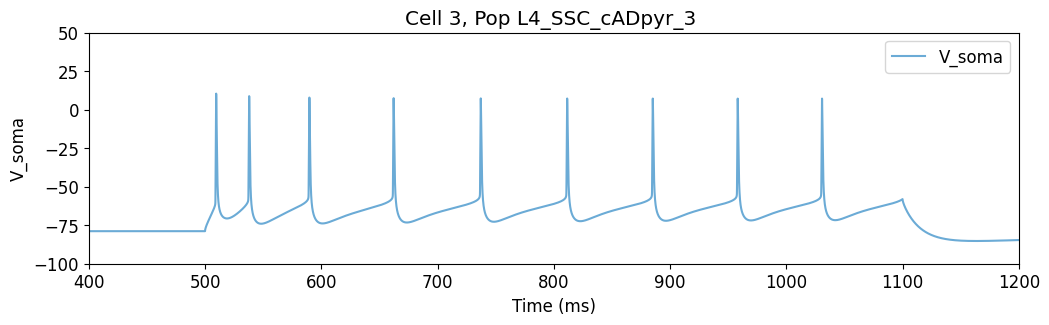

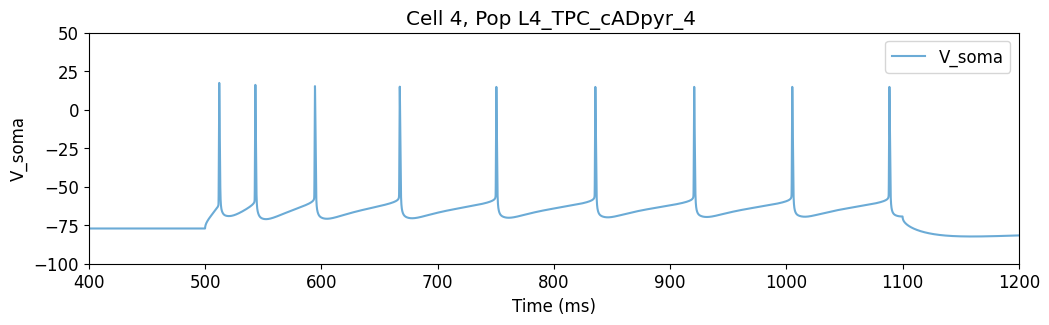

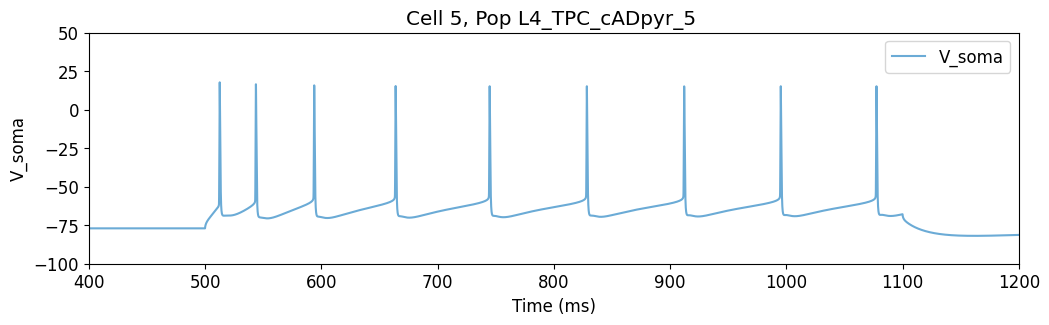

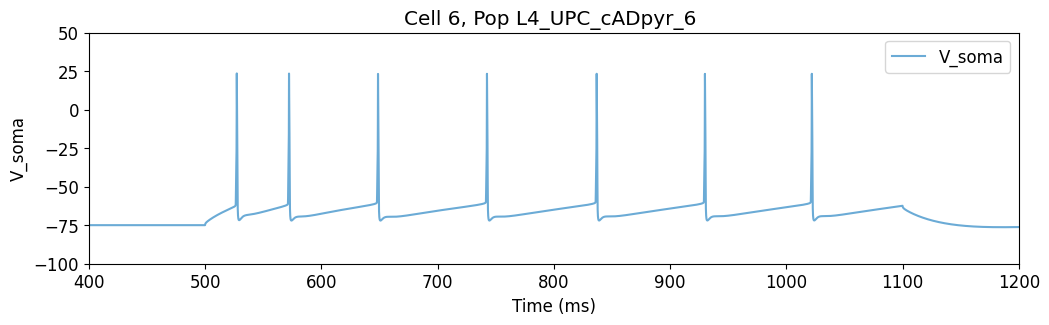

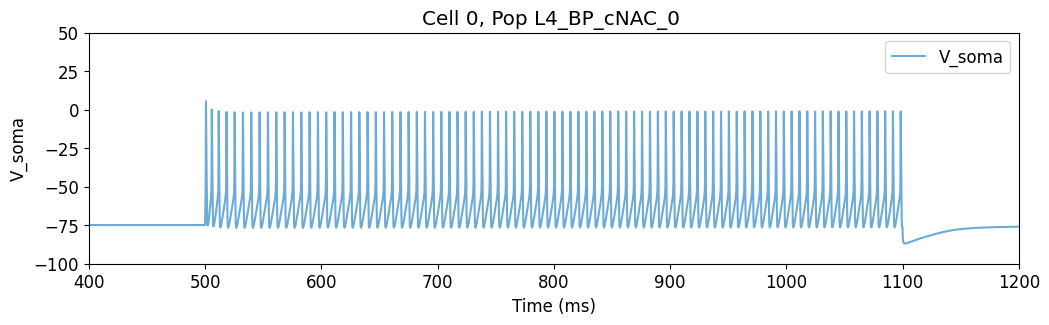

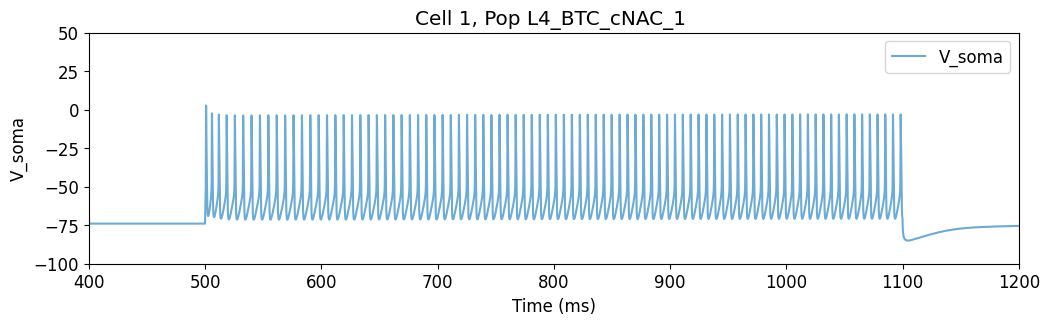

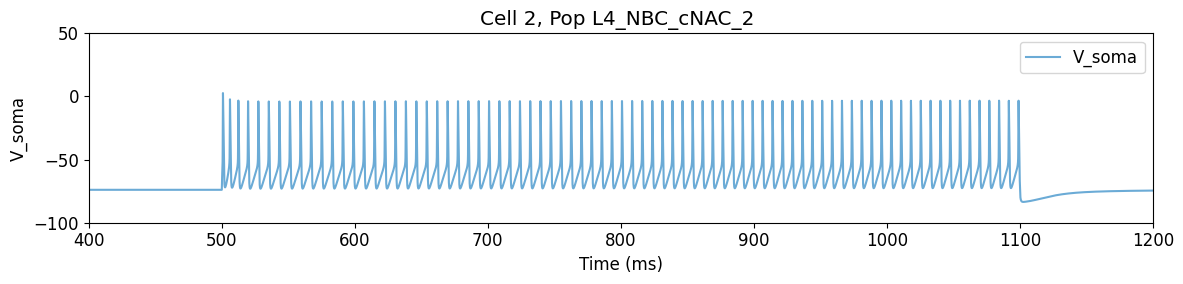

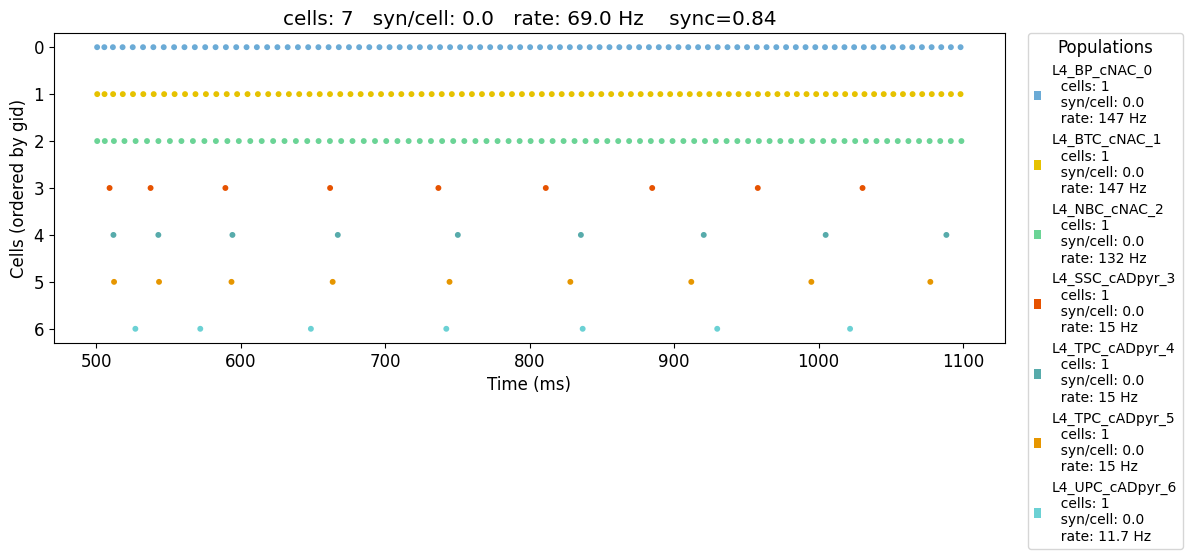

In [12]:
sim.gatherData();                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc

Preparing spike data...
Plotting raster...


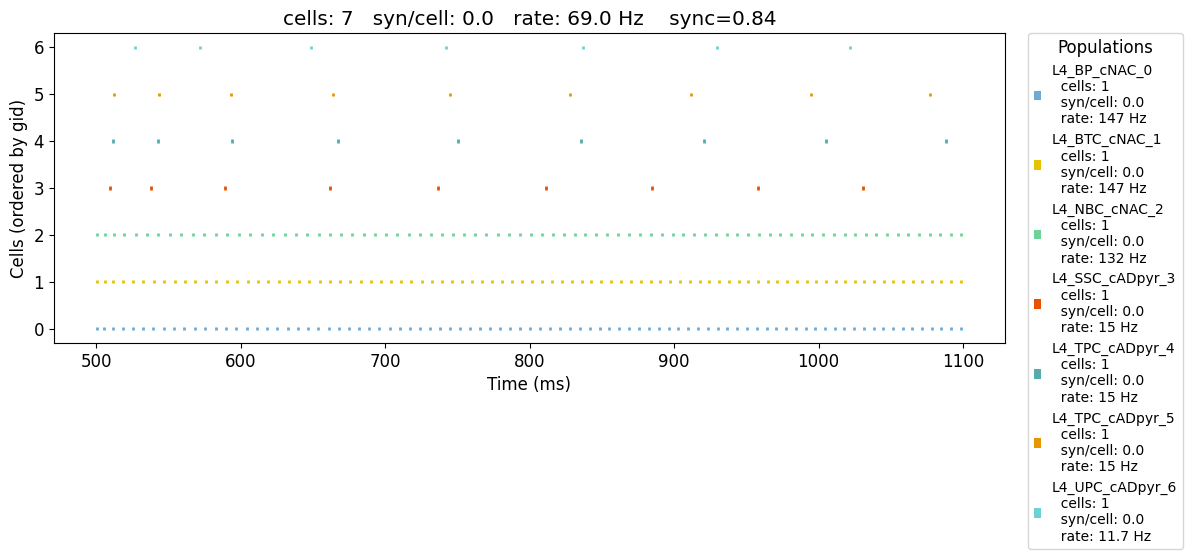

In [13]:
sim.analysis.plotRaster(include=cfg.Epops+cfg.Ipops, timeRange=[500,1100], figSize=(12,5), popRates=True);

Plotting recorded cell traces ... cell


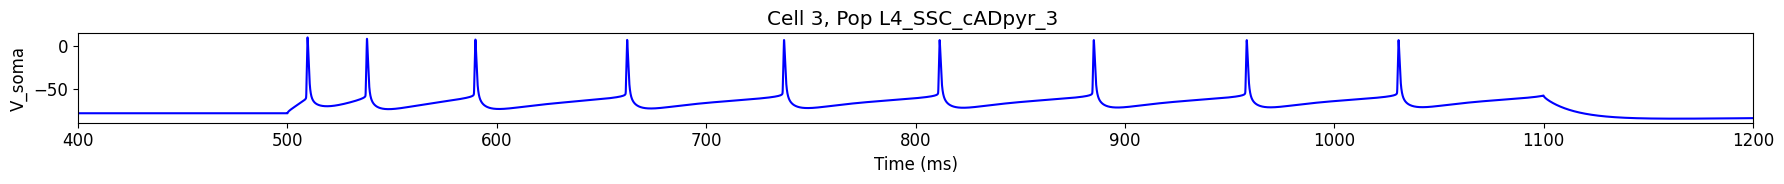

Plotting recorded cell traces ... cell


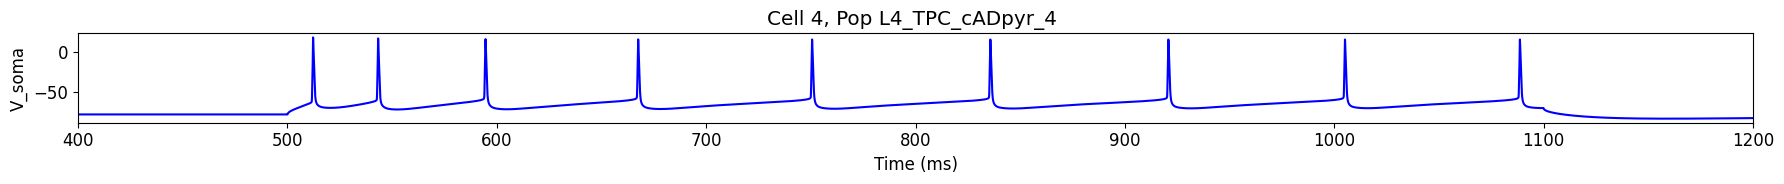

Plotting recorded cell traces ... cell


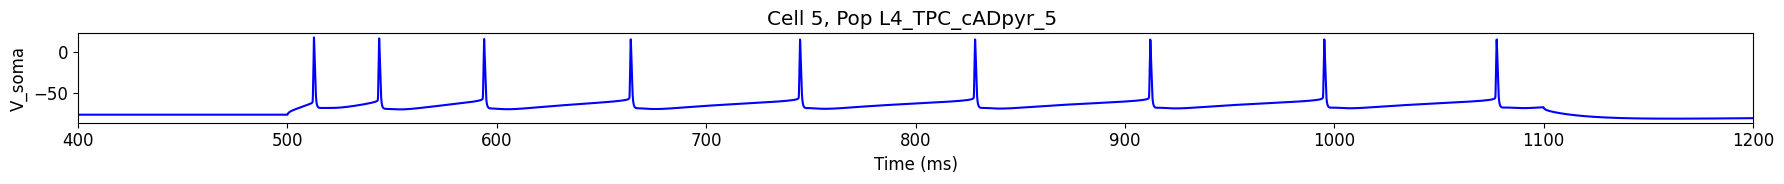

Plotting recorded cell traces ... cell


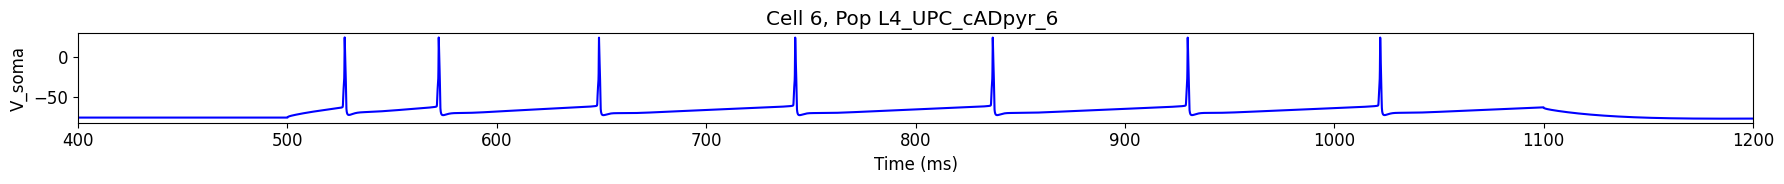

Plotting recorded cell traces ... cell


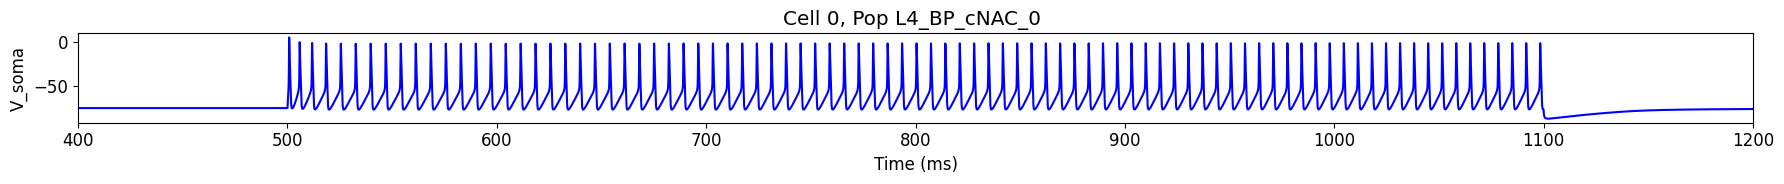

Plotting recorded cell traces ... cell


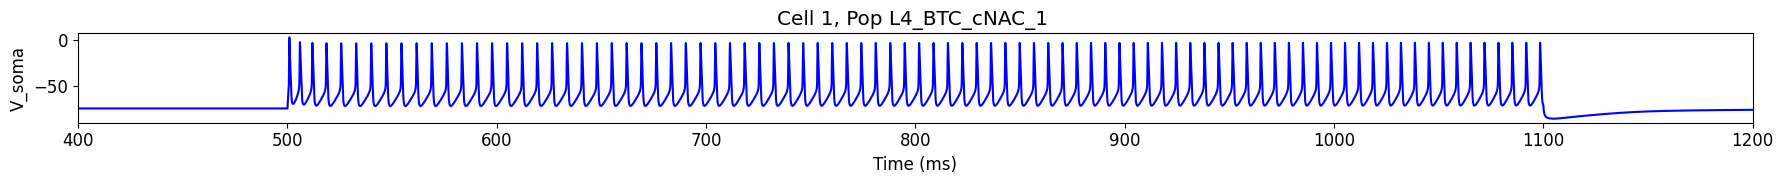

Plotting recorded cell traces ... cell


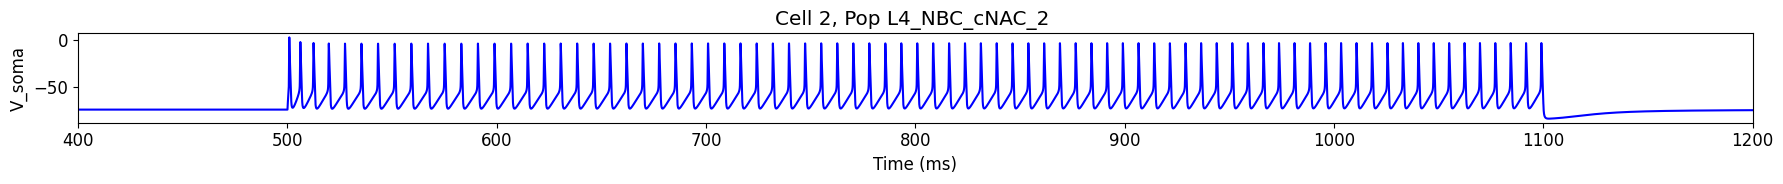

In [14]:
for pop in cfg.Epops+cfg.Ipops:
  sim.analysis.plotTraces(include=[pop], timeRange=[400,1200], overlay=False, oneFigPer='cell', figSize=(18,2));

Plotting recorded cell traces ... trace


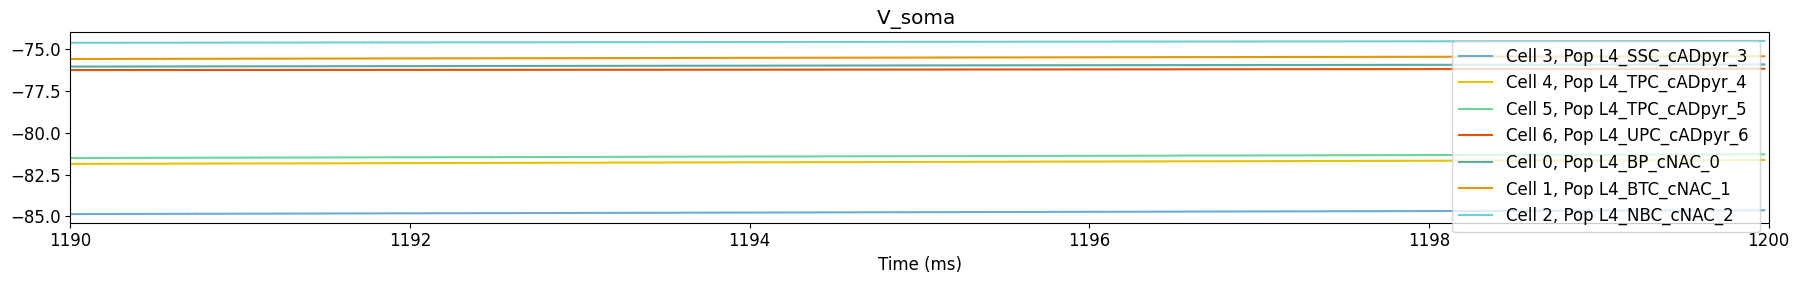

In [17]:
sim.analysis.plotTraces(include=cfg.Epops+cfg.Ipops, timeRange=[1190,1200], overlay=True, oneFigPer='trace', figSize=(18,3));

Plotting 3D cell shape ...


(<Figure size 800x800 with 2 Axes>, {})

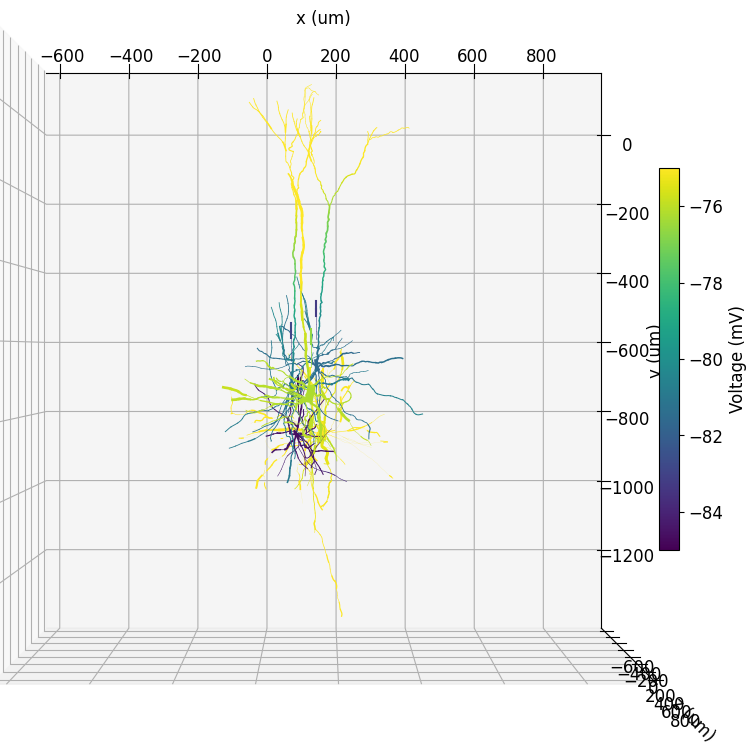

In [25]:
sim.analysis.plotShape(includePre= [ii for ii in range(0,7,1)], includePost= [ii for ii in range(0,7,1)], 
        includeAxon=False, showSyns=False, showElectrodes=False,
        cvar= 'voltage', dist=0.6, elev=90, azim=-90, 
        axisLabels=True, synStyle='o', 
        clim= [-85, -75], showFig=False, synSize=2, saveFig=False, figSize=(8,8))

Plotting 2D representation of network cell locations and connections...


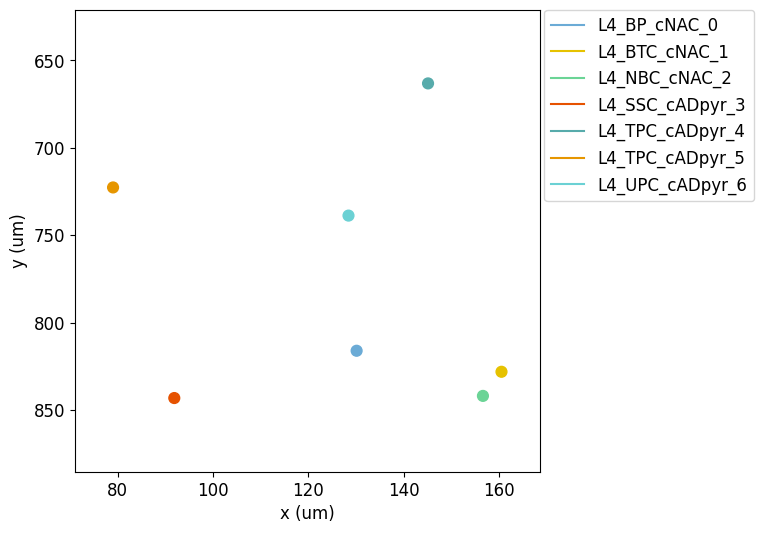

In [15]:
sim.analysis.plot2Dnet(include=cfg.Epops+cfg.Ipops, showConns=False, view='xy', figSize=(6,6));

Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...


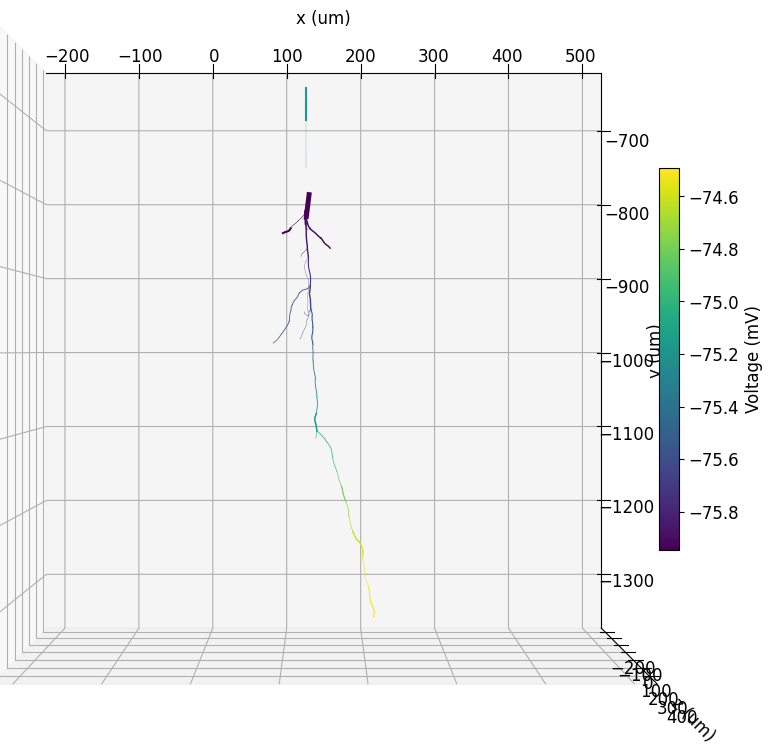

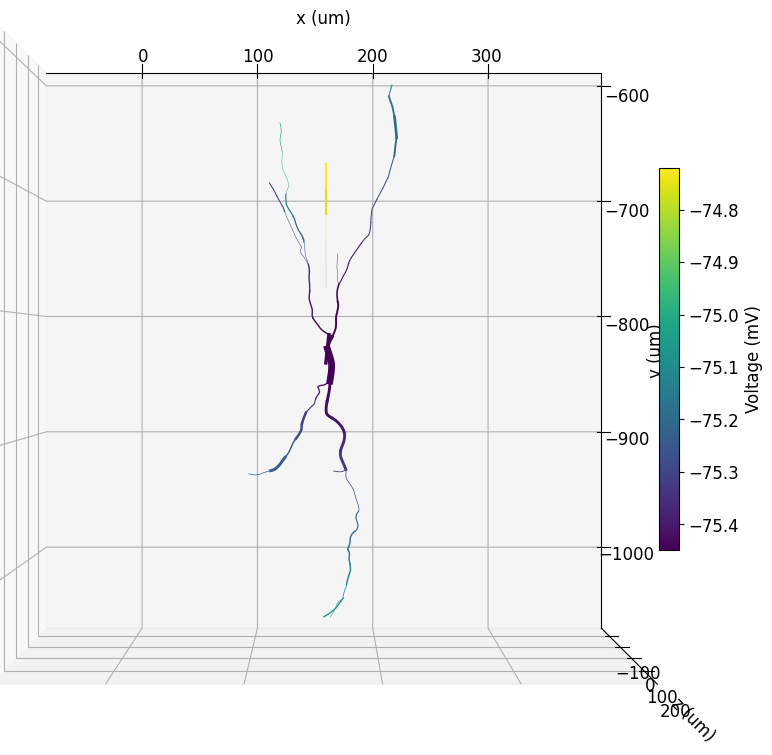

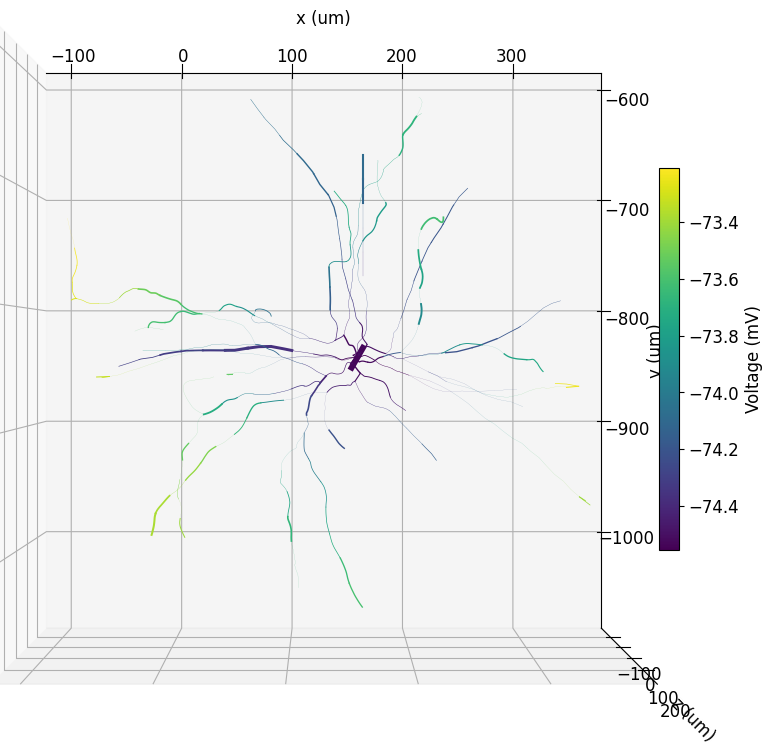

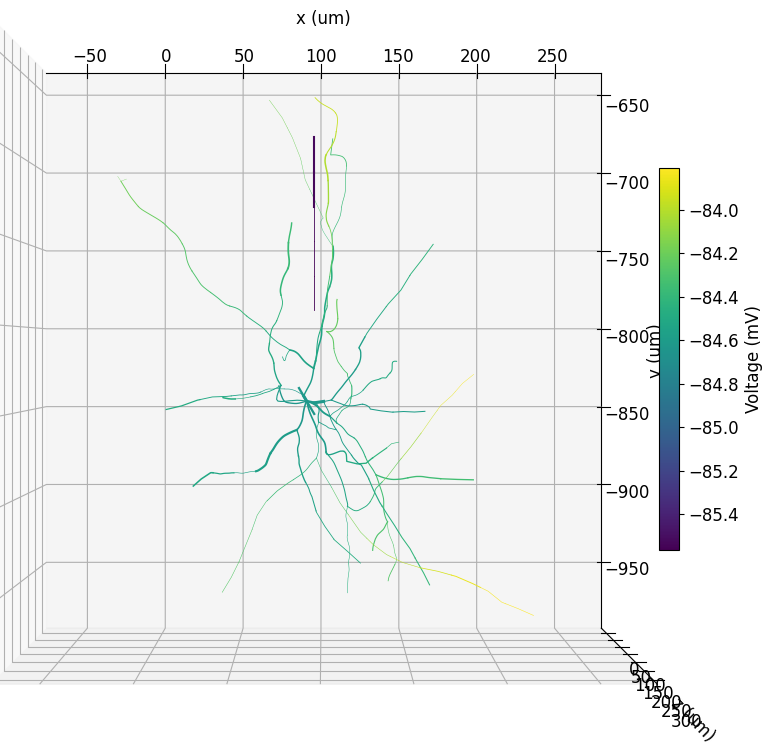

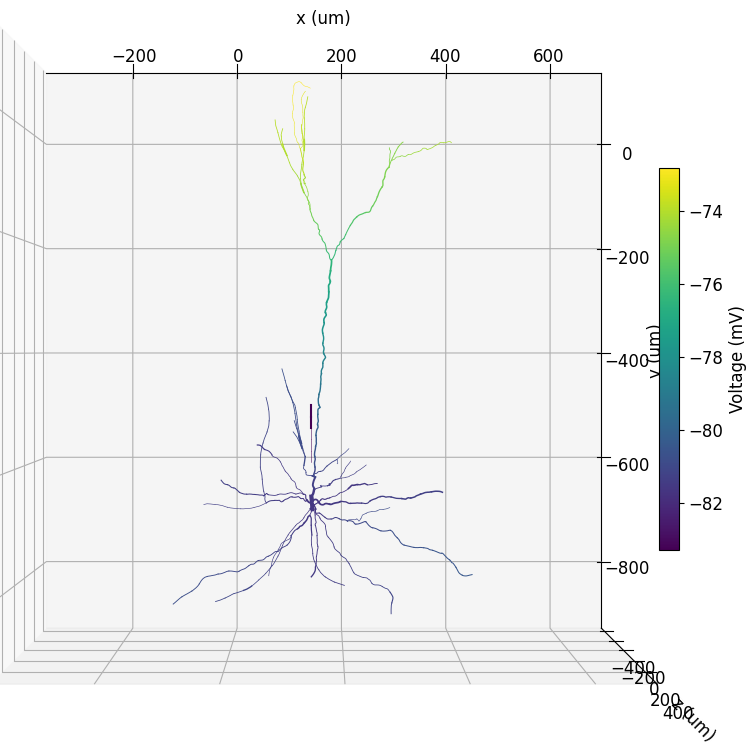

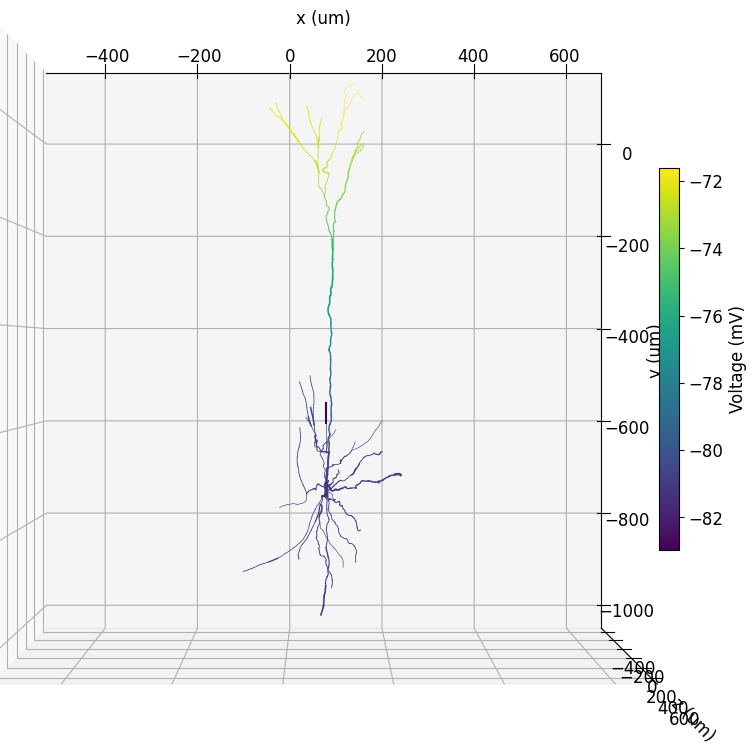

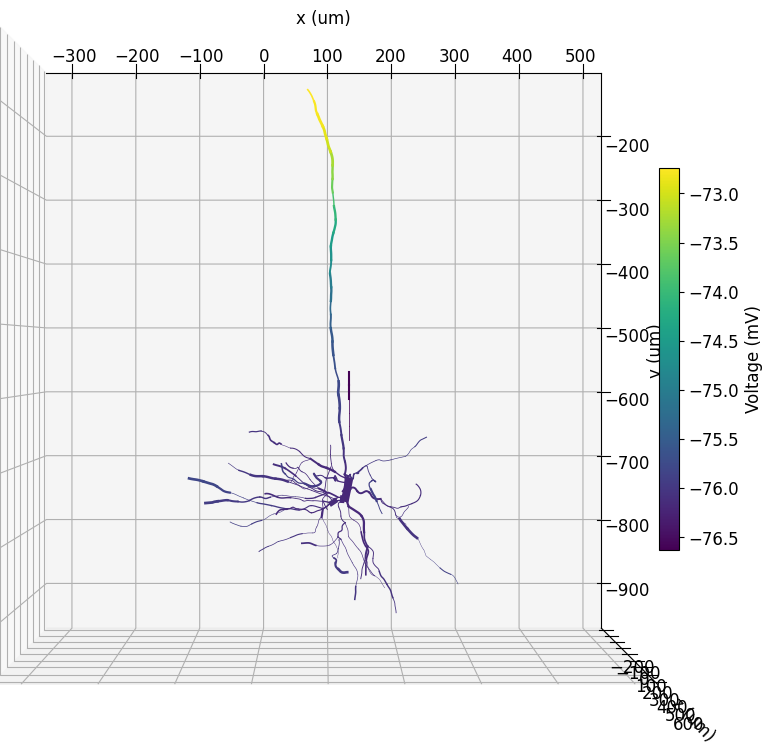

In [30]:
for ii in range(0,7,1):    
    sim.analysis.plotShape(includePre= [ii], includePost= [ii], 
        includeAxon=False, showSyns=False, showElectrodes=False,
        cvar= 'voltage', dist=0.6, elev=90, azim=-90, 
        axisLabels=True, synStyle='o', showFig=False, synSize=2, saveFig=False, figSize=(8,8))